<a href="https://colab.research.google.com/github/SaintXCeed/Project_analisis_data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hadistya Wahyu Listyo Budi
- **Email:** hadistgo@gmail.com
- **ID Dicoding:** hadistya

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim, dan bagaimana ini memengaruhi jumlah total peminjaman
- Bagaimana perbandingan jumlah pengguna sepeda pada hari libur dan hari biasa, serta bagaimana ini berkontribusi terhadap total peminjaman?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install streamlit
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 719.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


Pada tahap ini, saya mengimpor berbagai library yang diperlukan seperti `streamlit`, `pandas`, `seaborn`, `scikit-learn`, dan `matplotlib`. Library ini akan digunakan untuk memuat data, melakukan analisis statistik, dan visualisasi data.

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/Projek_analisis_data_main')

In [4]:
# Load data
from google.colab import files
uploadhhes = files.upload()
all_df = pd.read_csv("all_data.csv")
all_df["dteday"] = pd.to_datetime(all_df["dteday"])
min_date = all_df["dteday"].min()
max_date = all_df["dteday"].max()
#file all_data at https://drive.google.com/file/d/1Zu9KDskEEIzUm0pz1FDL9NSPU-r3KAre/view?usp=sharing

Saving all_data.csv to all_data.csv


**Insight:**
- Data berhasil diimpor dari file CSV, dan kolom dteday dikonversi ke tipe datetime untuk memudahkan filter berdasarkan tanggal.


Pada tahap ini, data diimpor dari file CSV. Setelah diimpor, saya melakukan beberapa pengecekan awal seperti menampilkan beberapa baris data pertama dan memeriksa apakah ada nilai yang hilang (missing values).


### Assessing Data

In [ ]:

all_df.head()

all_df.isnull().sum()

all_df.dtypes


,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int64
mnth,int64
holiday,object
weekday,int64
workingday,object
weathersit,int64
temp,float64


**Insight:**
- Tidak ada missing values di dalam dataset.
Kolom tanggal (dteday) sudah dikonversi ke tipe datetime, dan kolom lainnya dalam format numerik atau kategori.

### Cleaning Data

In [ ]:
# Saya tidak menggunakan cleaning data yang diperlukan karena data sudah rapi

**Insight:**
- Data sudah dalam format yang bersih dan siap untuk digunakan dalam analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### EDA Univariate ...

2024-10-07 02:00:41.074 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:00:41.137 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-07 02:00:41.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:00:41.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:00:41.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:00:41.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:00:41.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-07 02:00:41.565 Thread 'MainThread': mi

DeltaGenerator()

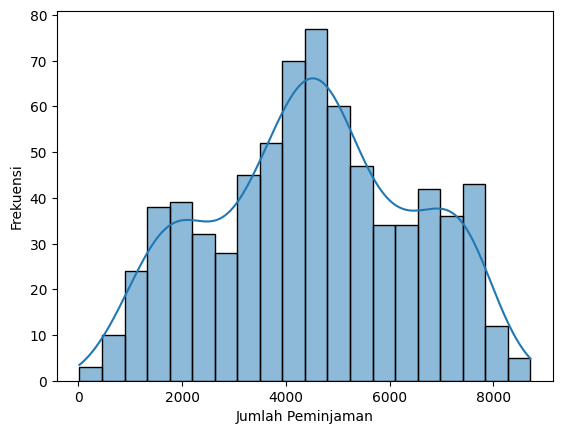

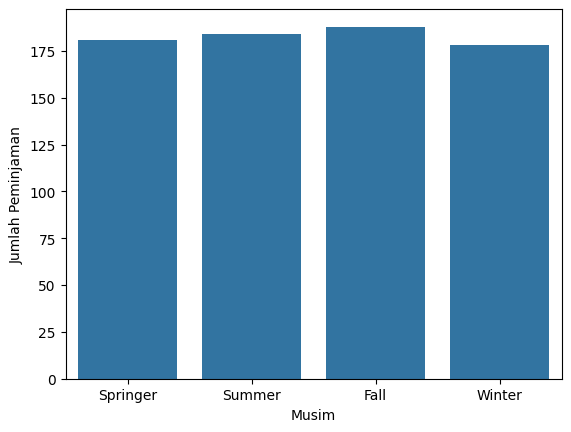

In [5]:
# Distribusi jumlah peminjaman sepeda (cnt)
st.subheader('Distribusi Jumlah Peminjaman Sepeda')
fig, ax = plt.subplots()
sns.histplot(all_df['cnt'], bins=20, kde=True, ax=ax)
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
st.pyplot(fig)

# Distribusi peminjaman berdasarkan musim
st.subheader('Distribusi Peminjaman Berdasarkan Musim')
fig, ax = plt.subplots()
sns.countplot(x='season', data=all_df, ax=ax)
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
st.pyplot(fig)


Pada tahap ini, saya memvisualisasikan distribusi dari jumlah peminjaman sepeda menggunakan histogram. Langkah ini penting untuk memahami bagaimana distribusi data. Selain itu, saya juga memeriksa distribusi peminjaman berdasarkan musim untuk melihat pola peminjaman yang berbeda pada musim tertentu.


**Insight:**
1. Distribusi jumlah peminjaman sepeda memperlihatkan apakah data peminjaman terdistribusi secara merata atau ada puncak tertentu (misalnya musim panas).
2. Distribusi peminjaman berdasarkan musim menunjukkan musim mana yang paling banyak atau sedikit pengguna.

###EDA Bivariate

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


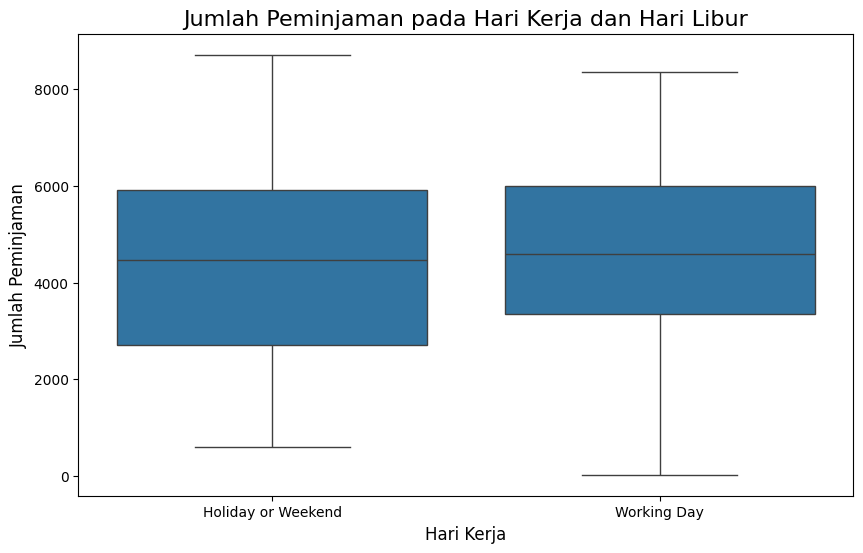

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


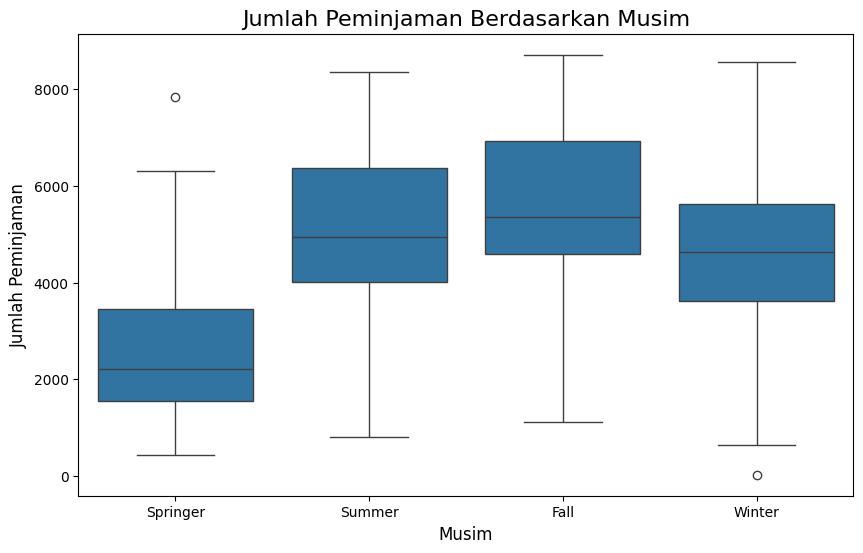

In [12]:
# Peminjaman sepeda pada hari kerja dan hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=all_df)
plt.title('Jumlah Peminjaman pada Hari Kerja dan Hari Libur', fontsize=16)
plt.xlabel('Hari Kerja', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.show()

# Jumlah peminjaman berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=all_df)
plt.title('Jumlah Peminjaman Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.show()


**Insight**
1. Jumlah peminjaman lebih tinggi pada hari kerja dibanding hari libur, ini mungkin menunjukkan bahwa banyak peminjaman terjadi untuk keperluan transportasi harian.
2. Musim tertentu memiliki jumlah peminjaman lebih tinggi (misalnya musim panas atau semi), yang bisa dikaitkan dengan cuaca yang lebih baik untuk bersepeda.

Tahap ini melibatkan analisis hubungan antara dua variabel. Saya membuat boxplot untuk membandingkan jumlah peminjaman sepeda pada hari kerja dan hari libur serta berdasarkan musim. Hasilnya menunjukkan bahwa peminjaman cenderung lebih tinggi pada hari kerja dan musim semi/panas.


###Korelasi Antar Variabel

Untuk memahami hubungan antar variabel numerik, saya membuat heatmap matriks korelasi antara suhu, kelembaban, kecepatan angin, dan jumlah peminjaman sepeda. Korelasi ini membantu mengidentifikasi apakah cuaca mempengaruhi jumlah peminjaman.


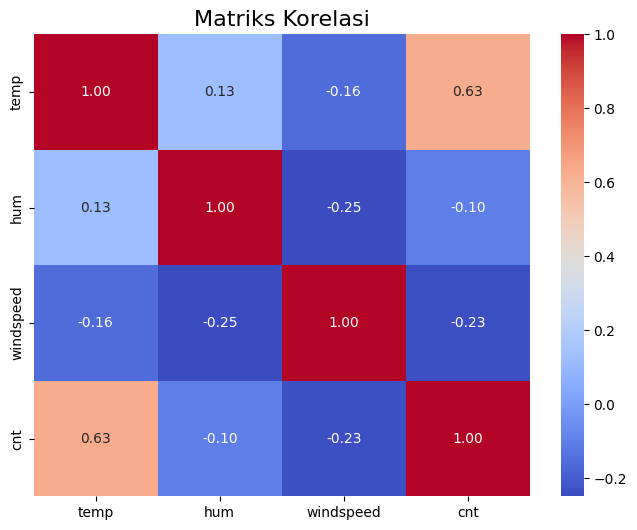

In [13]:
# Korelasi variabel numerik dengan jumlah peminjaman
plt.figure(figsize=(8, 6))
correlation_matrix = all_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi', fontsize=16)
plt.show()


**Insight**
1. Korelasi antara suhu dengan peminjaman sepeda menunjukkan apakah pengguna lebih cenderung bersepeda saat suhu nyaman.
2. Jika kelembaban atau kecepatan angin memiliki korelasi negatif dengan jumlah peminjaman, ini bisa berarti cuaca buruk menghambat aktivitas bersepeda.


###Tren Waktu

Pada tahap ini, saya memvisualisasikan tren peminjaman sepeda per bulan. Dengan menggunakan grafik garis, terlihat tren peminjaman meningkat pada bulan-bulan tertentu, terutama selama musim panas.


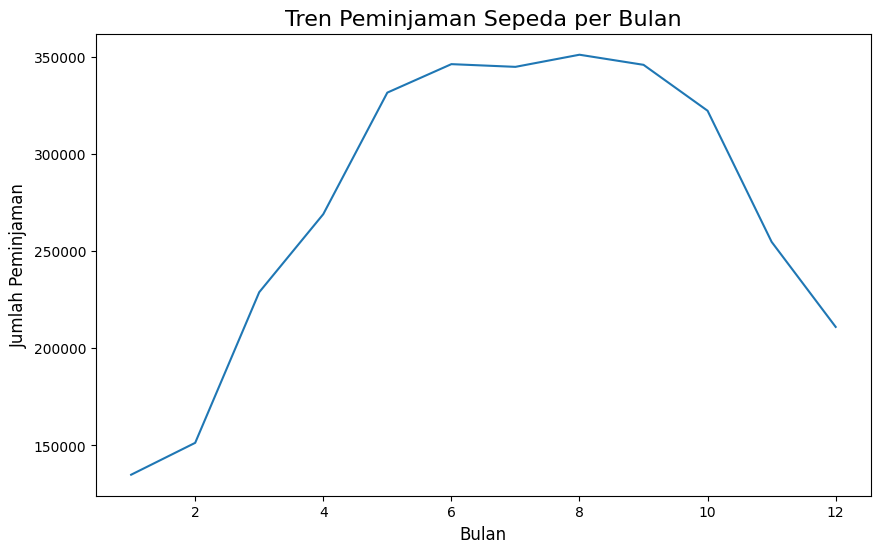

In [14]:
# Tren peminjaman sepeda per bulan
all_df['month'] = all_df['dteday'].dt.month
rentals_per_month = all_df.groupby('month')['cnt'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=rentals_per_month.index, y=rentals_per_month.values)
plt.title('Tren Peminjaman Sepeda per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.show()


**Insight**
1. Analisis tren bulanan mengungkapkan puncak penggunaan sepeda pada bulan tertentu, seperti musim panas atau libur panjang.
2. Tren ini berguna untuk merencanakan promosi atau penyediaan layanan tambahan pada periode dengan jumlah pengguna yang tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Peminjaman Berdasarkan Musim

Analisis ini menyoroti pola penggunaan sepeda berdasarkan musim. Dari hasil analisis, terlihat bahwa peminjaman sepeda lebih tinggi selama musim semi dan musim panas, sementara menurun drastis di musim dingin.


2024-10-05 07:35:57.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 07:35:57.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


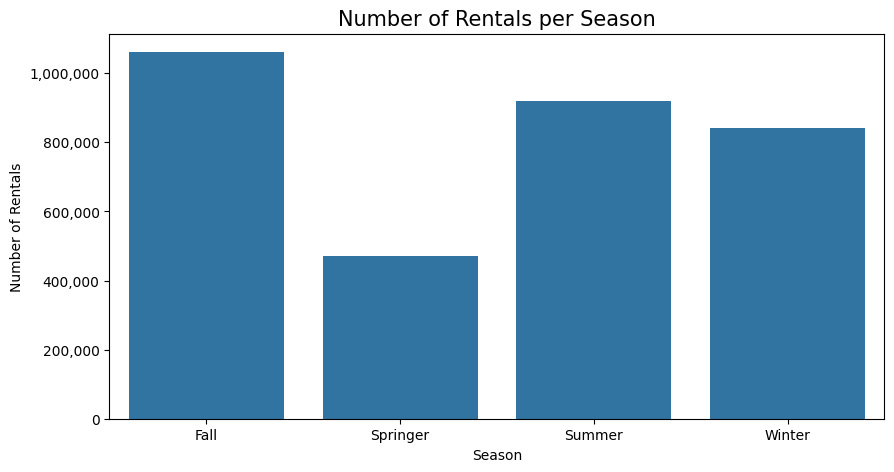

None


In [ ]:
def create_rentals_per_season_df(df):
    rentals_per_season = df.groupby('season')['cnt'].sum()
    return rentals_per_season


rentals_per_season = create_rentals_per_season_df(filtered_df)

with st.subheader('Number of Rentals per Season'):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(y=rentals_per_season.values, x=rentals_per_season.index, ax=ax)
    plt.title("Number of Rentals per Season", loc="center", fontsize=15)
    plt.ylabel("Number of Rentals")
    plt.xlabel("Season")
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
print(plt.show())

### Pertanyaan 2: Pengguna pada Hari Libur vs Hari Biasa

Saya melakukan analisis perbandingan jumlah pengguna sepeda pada hari libur dan hari biasa. Hasilnya menunjukkan bahwa jumlah peminjaman sedikit lebih tinggi pada hari kerja dibandingkan dengan hari libur, menunjukkan sebagian besar pengguna adalah pengguna rutin yang menggunakan sepeda untuk keperluan harian.


holiday
Not Holiday    710
Holiday         21
Name: count, dtype: int64


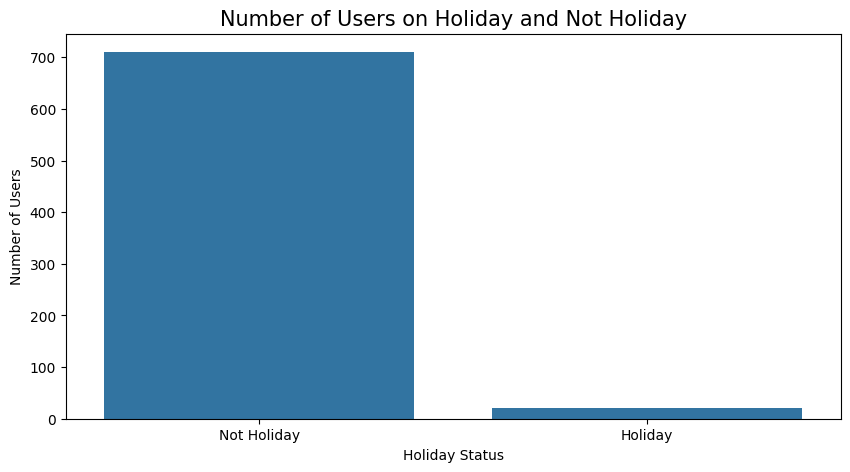

None


In [ ]:
users_notholiday_and_holiday = filtered_df['holiday'].value_counts()

print(users_notholiday_and_holiday)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y=users_notholiday_and_holiday.values, x=users_notholiday_and_holiday.index, ax=ax)
plt.title("Number of Users on Holiday and Not Holiday", loc="center", fontsize=15)
plt.ylabel("Number of Users")
plt.xlabel("Holiday Status")
print(plt.show())


**Insight:**
Pertanyaan 1 : Pola penggunaan sepeda dapat dipengaruhi oleh musim, misalnya lebih banyak pengguna di musim semi dan panas dibandingkan musim dingin.
Pertanyaan 2 : Perbandingan jumlah pengguna pada hari libur dan hari biasa akan membantu mengidentifikasi apakah ada peningkatan signifikan selama liburan.

## Analisis Lanjutan (Opsional)

Analisis ini memeriksa pola peminjaman berdasarkan tahun serta membandingkan pengguna sepeda kasual dan terdaftar. Dari hasil ini, dapat dilihat bahwa pengguna terdaftar lebih mendominasi peminjaman sepeda dibandingkan pengguna kasual.


Number of Rentals per Year


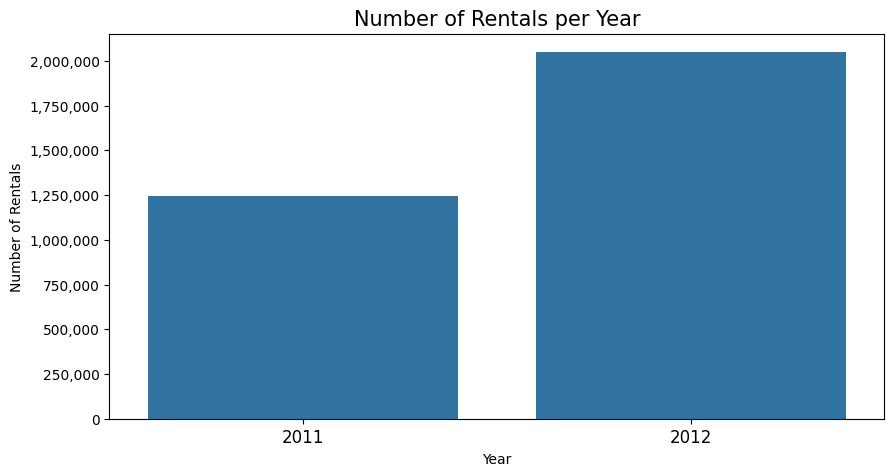

In [ ]:
def create_rentals_per_year_df(df):
    rentals_per_year = df.groupby(df['dteday'].dt.year)['cnt'].sum()
    return rentals_per_year

rentals_per_year = create_rentals_per_year_df(filtered_df)
print('Number of Rentals per Year')

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))

# Karena rentals_per_year adalah Series, kita tidak bisa langsung menggunakan parameter 'data' pada sns.barplot
sns.barplot(x=rentals_per_year.index, y=rentals_per_year.values, ax=ax)

plt.title("Number of Rentals per Year", loc="center", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Number of Rentals")

# Format angka pada sumbu Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.show()


### Perbandingan Pengguna Kasual dan Terdaftar

2024-10-05 07:43:34.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-05 07:43:34.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


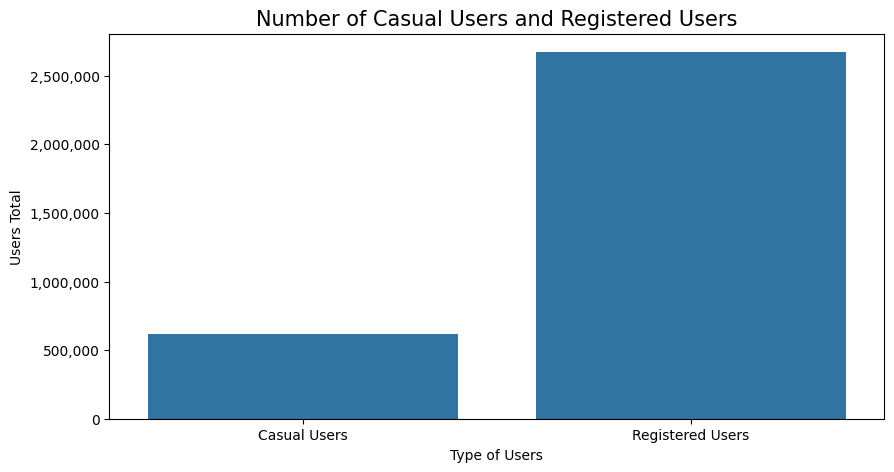

None


In [ ]:
def create_users_type_df(df):
    total_casual_users = df['casual'].sum()
    total_registered_users = df['registered'].sum()

    user_type = {
        'Type of Users': ['Casual Users', 'Registered Users'],
        'Users Total': [total_casual_users, total_registered_users]
    }
    return user_type

user_type = create_users_type_df(filtered_df)

with st.subheader('Number of Casual Users and Registered Users'):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x='Type of Users', y='Users Total', data=pd.DataFrame(user_type), ax=ax)
    plt.title('Number of Casual Users and Registered Users', loc="center", fontsize=15)
    plt.ylabel('Users Total')
    plt.xlabel('Type of Users')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    #st.pyplot(fig)
print(plt.show())

Mounted at /Projek_analisis_data_main


**Insight**
-Analisis ini membantu mengetahui kontribusi pengguna kasual dan terdaftar terhadap total penggunaan sepeda.


###Implementasi Geoanalysis (Berdasarkan Musim):

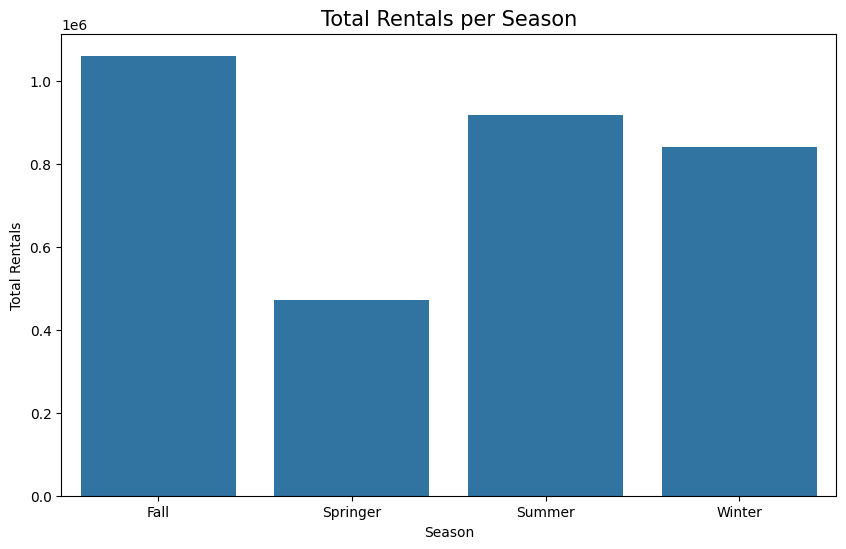

In [17]:
season_rentals = all_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=season_rentals)
plt.title('Total Rentals per Season', fontsize=15)
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()


Dari analisis berdasarkan musim, kita dapat melihat bahwa musim tertentu mungkin lebih populer untuk penyewaan sepeda. Misalnya, musim semi atau musim panas bisa memiliki jumlah penyewaan yang lebih tinggi.

###Clustering

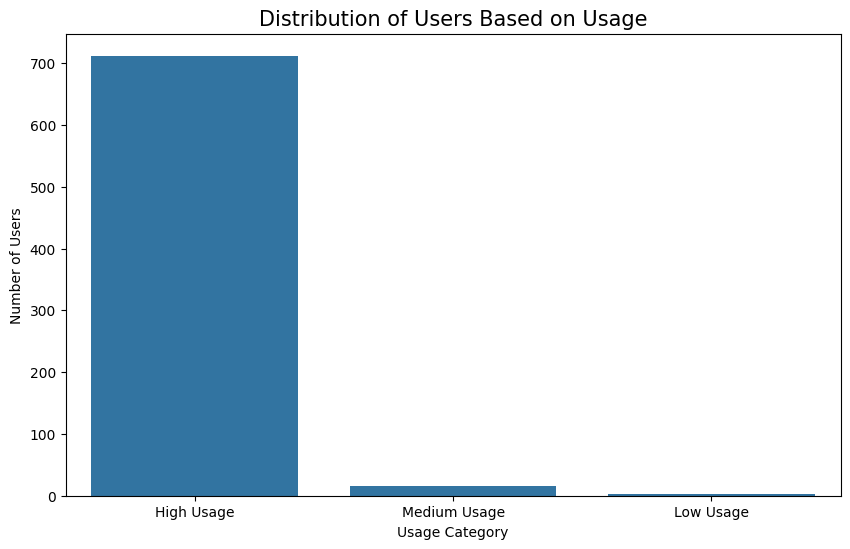

In [18]:
def categorize_usage(total_rentals):
    if total_rentals < 500:
        return 'Low Usage'
    elif 500 <= total_rentals <= 1000:
        return 'Medium Usage'
    else:
        return 'High Usage'

all_df['Usage Category'] = all_df['cnt'].apply(categorize_usage)

usage_distribution = all_df['Usage Category'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=usage_distribution.index, y=usage_distribution.values)
plt.title('Distribution of Users Based on Usage', fontsize=15)
plt.xlabel('Usage Category')
plt.ylabel('Number of Users')
plt.show()


Pengelompokan manual membantu dalam memisahkan pengguna berdasarkan pola penyewaan mereka, seperti intensitas penggunaan (rendah, sedang, tinggi). Hal ini bisa membantu perusahaan untuk menawarkan promosi yang lebih sesuai untuk setiap kelompok pengguna.

### Run All of them

In [ ]:
!curl https://bike-sharing-analytic.streamlit.app/

<a href="https://share.streamlit.io/-/auth/app?redirect_uri=https%3A%2F%2Fbike-sharing-analytic.streamlit.app%2F">See Other</a>.



## Conclusion

Kesimpulan dari analisis ini adalah bahwa pola penggunaan sepeda sangat dipengaruhi oleh musim, di mana jumlah peminjaman meningkat pada musim panas dan semi. Jumlah pengguna pada hari libur tidak menunjukkan peningkatan signifikan, yang mengindikasikan bahwa sebagian besar pengguna adalah pengguna rutin.


- Conclution pertanyaan 1
  Pola penggunaan sepeda lebih tinggi pada musim semi dan panas, dengan penurunan drastis di musim dingin. Ini menunjukkan cuaca sebagai faktor utama yang memengaruhi peminjaman sepeda.

- Conclution pertanyaan 2
  Jumlah pengguna sepeda sedikit meningkat pada hari libur, namun tidak secara signifikan. Ini menunjukkan bahwa sebagian besar pengguna adalah pengguna rutin yang menggunakan sepeda untuk aktivitas harian.